# Introduction to PyTorch

### 28th October 2020 by Juan-José Giraldo and Mauricio A Álvarez

In this Notebook, we look at the torch library in Python that allows automatic differentiation. PyTorch will be used to implement different neural network models later on.

### Tensors

A tensor generalises the concept of vectors and matrices to an arbitrary number of dimensions. Another name for the same concept is multidimensional arrays. The dimensionality of a tensor is the number of indexes used to refer to scalar values within the tensor. The cell below shows an example initialising a Tensor uniformly for 1D, 2D and 3D:

In [1]:
# We first import the torch library that comes with the Anaconda distribution
import torch 
# Tensor 1D presents 1 index
y = torch.rand([2])
print('Tensor 1D presents one index','with shape', y.shape,':\n',y) #get specific size with .shape
# Tensor 2D presents 2 indexes
y = torch.rand([2,3])
print('\nTensor 2D presents two indexes','with shape',y.shape,':\n',y)
#Tensor 3D presents 3 indexes
y = torch.rand([5,2,3])
print('\nTensor 3D presents three indexes','with shape',y.shape,':\n',y)

Tensor 1D presents one index with shape torch.Size([2]) :
 tensor([0.1597, 0.4784])

Tensor 2D presents two indexes with shape torch.Size([2, 3]) :
 tensor([[0.4113, 0.6506, 0.4150],
        [0.4751, 0.6611, 0.6608]])

Tensor 3D presents three indexes with shape torch.Size([5, 2, 3]) :
 tensor([[[0.0875, 0.3247, 0.2595],
         [0.5528, 0.8893, 0.8386]],

        [[0.7152, 0.3955, 0.0695],
         [0.3470, 0.1166, 0.2582]],

        [[0.7423, 0.6850, 0.2589],
         [0.8233, 0.5289, 0.7767]],

        [[0.5952, 0.4678, 0.5277],
         [0.1100, 0.8469, 0.8166]],

        [[0.9890, 0.2577, 0.4693],
         [0.1405, 0.0321, 0.3775]]])


In [2]:
# Create a tensor with specific values
x = torch.tensor([4.0,5.0],dtype=torch.float32)
y = torch.tensor([2.0,3.0],dtype=torch.float32)

# Tensor multiplication (point-wise multiplication)
print(x*y)

tensor([ 8., 15.])


### Initialise a tensor with torch.zeros or torch.ones 

In [3]:
x_zeros = torch.zeros([3,4])
print('x_zeros:',x_zeros,'with shape',x_zeros.shape,'\n')
x_ones = torch.ones([2,6])
print('x_ones:',x_ones,'with shape',x_ones.shape)

x_zeros: tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]) with shape torch.Size([3, 4]) 

x_ones: tensor([[1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1.]]) with shape torch.Size([2, 6])


### Reshape a tensor using .view

In [4]:
y = torch.ones([3,2])
y_reshaped = y.view(6,1)  # in contrast to the common numpy library, we use .view instead of .reshape
print(y_reshaped)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])


### Numpy interoperability 

PyTorch tensors can be converted efficiently to NumPy arrays and vice versa. By doing so, you can leverage the huge swath of functionality in the wider Python ecosystem that has built up around the NumPy array type.

In [5]:
# Tensor_torch to tensor Numpy
Tensor_torch = torch.ones(3,4)
Tensor_numpy = Tensor_torch.numpy() #Returns a NumPy multidim. array of the right size, shape and numerical type.
print('Array in numpy form with shape', Tensor_numpy.shape,':\n',Tensor_numpy)

# Tensor Numpy to Tensor_torch
import numpy as np
Tensor_np = np.random.randn(5,8)    
Tensor_numpy_to_torch = torch.from_numpy(Tensor_np)
print('\nArray from Numpy to Torch with shape', Tensor_numpy_to_torch.shape,':\n',Tensor_numpy_to_torch)

Array in numpy form with shape (3, 4) :
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

Array from Numpy to Torch with shape torch.Size([5, 8]) :
 tensor([[ 0.6692,  1.2712, -0.5606,  0.3117, -1.0058,  0.2658,  0.4705, -0.1417],
        [ 1.2965,  0.1749,  0.2284,  0.0975, -0.3290, -0.4878,  0.0358,  0.4082],
        [-0.8241, -1.8312, -0.1691,  0.1388, -1.2588, -1.4679, -1.6733,  2.8168],
        [-0.1823, -0.6149, -0.4042, -1.7489,  0.1066,  0.6491, -1.9415, -0.1734],
        [-0.1478,  0.0550, -1.2959,  1.5696,  0.5920, -1.0507, -1.8888, -0.1959]],
       dtype=torch.float64)


## Automatic Differentiation

PyTorch allows to automatically obtain the gradients of a tensor with respect to a defined function. When creating the tensor, we have to indicate that it requires the gradient computation using the flag `requires_grad`  

In [6]:
x = torch.rand(3,requires_grad=True)
print(x)

tensor([0.8730, 0.7841, 0.1503], requires_grad=True)


Notice that now the Tensor shows the flag `requires_grad` as True. We can also activate such a flag in a Tensor already created as follows:

In [7]:
x = torch.tensor([1.0,2.0,3.0])
x.requires_grad_(True)
print(x)

tensor([1., 2., 3.], requires_grad=True)


Let us define a function $y=x^2+5$. The function $y$ will not only carry the result of evaluating $x$, but also the gradient function $\frac{\partial y}{\partial x}$ called `grad_fn` in the new tensor $y$

In [8]:
x = torch.tensor([2.0])
x.requires_grad_(True)  #indicate we will need the gradients with respecto to this variable
y = x**2 + 5
print(y)

tensor([9.], grad_fn=<AddBackward0>)


To evaluate the partial derivative $\frac{\partial y}{\partial x}$, we use the `.backward()` function and the result of the gradient evaluation is stored in `x.grad` 

In [9]:
y.backward()  #dy/dx
print('PyTorch gradient:', x.grad)

#L et us compare with the analitical gradient of y = x**2+5
with torch.no_grad():    #this is to only use the tensor value without its gradient information
    dy_dx = 2*x  #analitical gradient
print('Analitical gradient:',dy_dx)

PyTorch gradient: tensor([4.])
Analitical gradient: tensor([4.])


If we evaluate a vector $\mathbf{w}=[w_1, \ldots, w_D]^{\top}$, to compute another vector $\mathbf{g}=[g_1, \ldots, g_D]^{\top}$ with elements $g_i=w_i^2+5$, then we obtain a vector $\mathbf{g}$ that contains each evaluation of the function. If we want to obtain the gradient w.r.t $\mathbf{w}$ by using "g.backward()", we have to bypass a vector of size equal to w.shape to the function, i.e., "g.backward(vect)". 

In [10]:
w = torch.tensor([1.0,2.0,3.0])
w.requires_grad_(True)

g = w**2+5
# Below, the values [1.0,1.0,1.0] are multiplied by the gradient g.backward(vect)
# of course using the ones does not modify the value of the gradient
vect = torch.tensor([1.0,1.0,1.0],dtype=torch.float32) 
g.backward(vect)
print(w.grad)

tensor([2., 4., 6.])


On the other hand, when accessing the gradients in a for loop, PyTorch acummulates the gradients at each
iteration. In order to avoid this behaviour, we have to use the function .grad.zero_() also at each iteration. See in the example below what happens when commenting and uncommenting the line "w.grad.zero_()":

In [11]:
#Pytorch uses a cumulative process for the gradients
w = torch.tensor([1.0,2.0,3.0])
w.requires_grad_(True)

for i in range(3):
    g = w**2+5
    g.backward(torch.ones_like(w))
    print(w.grad)
    w.grad.zero_()    #this line avoids the acummulation of the gradients uncomment it to see its effect

tensor([2., 4., 6.])
tensor([2., 4., 6.])
tensor([2., 4., 6.])


###  Question 1

Verify that the gradients provided by PyTorch coincide with the analitical gradients of the function $f = \exp \big(-x^2-2x- \sin (x) \big)$ w.r.t $x$.

In [ ]:
# Provide your answer here

## Linear Regression Basic Example

We now provide a very simple example of linear regression with one input dimension, $y=wx+b$, and illustrate how we use PyTorch to optimise the parameters of the model

In [12]:
Ndata = 100 
x = torch.rand(Ndata)
true_w = 1.5
true_bias = 1.0
# We generate the dataset from the actual model but adding some noise
y = true_w*x + true_bias + 0.05*torch.randn(Ndata)
# We make sure to set the requires_grad flag to True for both paratemers
w = torch.tensor(0.0,dtype=torch.float32,requires_grad=True)
bias = torch.tensor(0.0,dtype=torch.float32,requires_grad=True)

We now define two useful functions, the prediction function and the objective function

In [13]:
def model_prediction(x,w,bias):
    return w*x + bias

def loss_function(y,y_pred):
    return ((y_pred-y)**2).mean()  #Mean Squared Error (MSE)

And we use coordinate descent to estimate the parameters of the model

\begin{align*}
    w_{k+1} = w_k - \eta \frac{dE}{dw}\\ 
    b_{k+1} = b_k - \eta \frac{dE}{db}\\ 
\end{align*}

We know that there is a closed form solution for $w$ and $b$ through the normal equation. The example is for illustrative purposes.

In [14]:
Max_Niter = 500
step_size = 0.1
for Niter in range(Max_Niter):
    # Evaluate the prediction and the loss
    y_approx = model_prediction(x,w,bias)
    my_loss = loss_function(y,y_approx)
    
    # The function .backward() has to be called in order to load the grads in w.grad
    # Notice that here it is not necessary to bypass a vector since loss_function is a scalar function
    my_loss.backward()  
        
    with torch.no_grad():        # this line avoids the gradient update while allowing to change the value of w
        w -= step_size*w.grad    # it is necessary to avoid the grad update while modifying the variable
        bias -= step_size*bias.grad
    
    # Make the zero gradient to avoid acummulation
    w.grad.zero_()
    bias.grad.zero_()
    
    # We print the loss, and the parameters values every 50 iterations
    if Niter%50==0:
        print(f'Iteration = {Niter+1}, Loss = {my_loss:.8f}, w = {w:.3f}, bias = {bias:.3f}')        

print(f'Iteration = {Niter+1}, Loss = {my_loss:.8f}, w = {w:.3f}, bias = {bias:.3f}')    
    

Iteration = 1, Loss = 3.43236446, w = 0.219, bias = 0.360
Iteration = 51, Loss = 0.01333260, w = 1.133, bias = 1.205
Iteration = 101, Loss = 0.00538315, w = 1.301, bias = 1.109
Iteration = 151, Loss = 0.00321565, w = 1.389, bias = 1.058
Iteration = 201, Loss = 0.00262467, w = 1.435, bias = 1.032
Iteration = 251, Loss = 0.00246353, w = 1.459, bias = 1.018
Iteration = 301, Loss = 0.00241959, w = 1.471, bias = 1.011
Iteration = 351, Loss = 0.00240761, w = 1.478, bias = 1.007
Iteration = 401, Loss = 0.00240435, w = 1.481, bias = 1.005
Iteration = 451, Loss = 0.00240346, w = 1.483, bias = 1.004
Iteration = 500, Loss = 0.00240321, w = 1.484, bias = 1.004


We finally plot the result

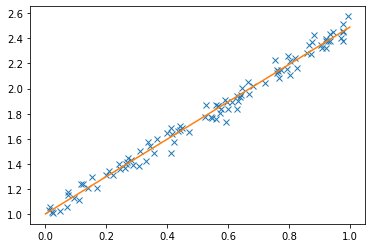

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x,y,'x')
xtest = torch.linspace(0,1,10)
with torch.no_grad():
    y_pred = model_prediction(xtest,w,bias)
plt.plot(xtest,y_pred)

### Loading a .csv dataset

We can take advantage of the interoperability between Numpy and PyTorch by loading a .csv data as a numpy array and transforming it to a Torch Tensor using `torch.from_numpy(dataset_np)`. 

In [ ]:
# This cell is simply to download the winequality-red.csv dataset from its root url
import urllib.request
urllib.request.urlretrieve('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', './winequality-red.csv')

In [ ]:
import numpy as np
#In the line below we avoid the first row (skiprows=1) of .csv file that contains names
#the delimeter of data for this dataset is ";"
wine_np = np.loadtxt("./winequality-red.csv",dtype=np.float32,delimiter=";",skiprows=1)
wine_torch = torch.from_numpy(wine_np)  #We take advantage of the interoperability with numpy
wine_torch